In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

C:\Users\64800\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\64800\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\64800\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [3]:
books = pd.read_csv('New_Books.csv')
users = pd.read_csv('New_Users.csv')
ratings = pd.read_csv('New_Ratings.csv')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Description,Page Count,Genre,Average Rating,Rating Count
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Originally published: Handbook of classical my...,393.0,Social Science\n,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",432.0,Fiction\n,4.0,18.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,"“The best-researched, best-written account [of...",753.0,History\n,4.0,1.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,"The fascinating, true story of the world's dea...",330.0,Social Science\n,4.0,15.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,A look at the incredibly well-preserved ancien...,240.0,History\n,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,0771594348,Taste of Quebec,Julian Armstrong,1990,Macmillan of Canada,http://images.amazon.com/images/P/0771594348.0...,http://images.amazon.com/images/P/0771594348.0...,http://images.amazon.com/images/P/0771594348.0...,Canada’s culinary treasure revealed in recipes...,416.0,Cooking\n,NaN,NaN
49988,1895555752,ChrÃ©tien,Lawrence Martin,1995,Lester Pub,http://images.amazon.com/images/P/1895555752.0...,http://images.amazon.com/images/P/1895555752.0...,http://images.amazon.com/images/P/1895555752.0...,Seminar paper from the year 2006 in the subjec...,32.0,unknown,NaN,NaN
49989,0771044089,For the Birds: Nature Notes from a Woodland St...,Linda Johns,2000,Random House Inc,http://images.amazon.com/images/P/0771044089.0...,http://images.amazon.com/images/P/0771044089.0...,http://images.amazon.com/images/P/0771044089.0...,Linda Johns is for the birds – in the best pos...,291.0,Wild birds as pets\n,NaN,NaN
49990,0774806532,"Canada and Quebec: One Country, Two Histories",Robert Bothwell,1998,UBC Press,http://images.amazon.com/images/P/0774806532.0...,http://images.amazon.com/images/P/0774806532.0...,http://images.amazon.com/images/P/0774806532.0...,Relations between Canada and Quebec have never...,296.0,History\n,NaN,NaN


In [4]:
books['Page Count'].fillna('unknown', inplace=True)

In [5]:
users

,User-ID,Location,Age
0,2,"stockton, california, usa",18.0
1,8,"timmins, ontario, canada",NaN
2,9,"germantown, tennessee, usa",NaN
3,10,"albacete, wisconsin, spain",26.0
4,12,"fort bragg, california, usa",NaN
...,...,...,...
69439,278844,"st. paul, minnesota, usa",28.0
69440,278846,"toronto, ontario, canada",23.0
69441,278849,"georgetown, ontario, canada",23.0
69442,278851,"dallas, texas, usa",33.0


In [6]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276727,0446520802,0
2,276744,038550120X,7
3,276746,0425115801,0
4,276746,0449006522,0
...,...,...,...
575875,276704,0446353957,0
575876,276704,0446605409,0
575877,276704,0743211383,7
575878,276704,080410526X,0


In [7]:
# authors = books['Book-Author'].apply(lambda x: ''.join(str(x).split())).unique()
# publishers = books['Publisher'].apply(lambda x: ''.join(str(x).split())).unique()

In [8]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1,ngram_range=(1,1), stop_words='english')
# combined = pd.merge(books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1), ratings, how='left', on='ISBN')
# combined = pd.merge(combined, users, how='outer', on='User-ID')
# combined

# tfidf_matrix = tfidf.fit_transform(combined['Book-Title'])
# tfidf_matrix = tfidf.fit_transform(publishers)
# len(tfidf.vocabulary_)
# tfidf_matrix = tfidf.fit_transform(combined[['Book-Title', 'description']].apply(lambda x: ' '.join(x.values.astype(str)), axis=1))

In [9]:
# title =  np.array(list(tfidf.vocabulary_.keys())).astype(str)
# vocabulary = np.hstack([authors, publisher, title])
# voca = {key:value for value, key in enumerate(vocabulary)}

In [10]:
tfidf = TfidfVectorizer(stop_words='english', dtype=np.float32, sublinear_tf=True)
tfidf_matrix = tfidf.fit_transform(books[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Description', 'Page Count', 'Genre']].apply(lambda x: ' '.join(x.values.astype(str)), axis=1))
num_tfidf = len(tfidf.vocabulary_)

In [11]:
device = torch.device('cuda')

In [12]:
num_samples = len(books)
train_idx, test_idx = train_test_split(np.arange(num_samples), test_size=0.2)

train_X = tfidf_matrix[train_idx]
test_X = tfidf_matrix[test_idx]

In [13]:
class Content(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index):
        x = torch.tensor(self.x[index].todense())[0]
        return x

In [14]:
train_set = Content(train_X)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, pin_memory=True)
val_set = Content(test_X)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, pin_memory=True)

In [15]:
class ContentFilter(nn.Module):
    def __init__(self, vocal_dim, hidden_dim, latent_dim, dropout=0):
        super().__init__()

        self.encoder = nn.Sequential(nn.Linear(vocal_dim, hidden_dim),
                                     nn.ReLU(),
                                     nn.Dropout(dropout),
                                     nn.Linear(hidden_dim, latent_dim)
                                    )
        self.decoder = nn.Sequential(nn.ReLU(),
    #                                  nn.Dropout(dropout),
                                     nn.Linear(latent_dim, hidden_dim),
                                     nn.ReLU(),
                                     nn.Dropout(dropout),
                                     nn.Linear(hidden_dim, vocal_dim)
                                    )
    
    def forward(self, x):
        embed = self.encoder(x)
        x_new = self.decoder(embed)
        return x_new, embed

In [16]:
content = ContentFilter(num_tfidf, 256, 64)
criterion_content = nn.MSELoss()
optimizer_content = torch.optim.Adam(content.parameters(), lr=1e-3, weight_decay=5e-4)

In [17]:
def train_content(model, epochs, train_loader, val_loader, optimizer, criterion, device):
    train_loss_iteration = []
    train_loss_epoch = []
    
    val_loss_iteration = []
    val_loss_epoch = []
    
    model.to(device)
    model.train()
    
    no_improve = 0
    for i in range(epochs):
        print(f'Epoch {i+1}:')
        train_loss = []
        val_loss = []
        for n, data in enumerate(train_loader):
            data = data.to(device)
            
            data_new, embed = model(data)
            
            loss = criterion(data_new, data)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss.append(loss.detach().cpu())
            if (n+1)% 100 == 0:
                print(f'Batch [{n+1}/{len(train_loader)}], Training loss is {np.mean(train_loss).item()}.')
        
        train_loss_iteration.extend(train_loss)
        train_loss_epoch.append(np.mean(train_loss).item())
        
        model.eval()
        with torch.no_grad():
            for m, data in enumerate(val_loader):
                data = data.to(device)
            
                data_new, embed = model(data)

                loss = criterion(data_new, data)
                val_loss.append(loss.cpu())

                if (m+1)% 100 == 0:
                    print(f'Batch [{m+1}/{len(val_loader)}], Validation loss is {np.mean(val_loss).item()}.')
    #                 print(f'Batch [{m+1}/{len(val_loader)}], Validation accuracy is {torch.mean(val_acc).item()}.')
        
        val_loss_iteration.extend(val_loss)
        
        model.train()
        
        if i == 0:
            torch.save(model.state_dict(), 'content.pth')
        else:
            if np.mean(val_loss) <= min(val_loss_epoch):
                torch.save(model.state_dict(), 'content.pth')
                no_improve = 0
            else:
                no_improve += 1
        
        val_loss_epoch.append(np.mean(val_loss).item())
        
        if no_improve == 5:
            break
        
    return train_loss_iteration, train_loss_epoch, val_loss_iteration, val_loss_epoch

In [18]:
num_epoch = 5
train_loss_iteration, train_loss_epoch, val_loss_iteration, val_loss_epoch = train_content(content, num_epoch, train_loader, val_loader, optimizer_content, criterion_content, device)

Epoch 1:
Batch [100/625], Training loss is 0.00032965888385660946.
Batch [200/625], Training loss is 0.00016905034135561436.
Batch [300/625], Training loss is 0.00011550958879524842.
Batch [400/625], Training loss is 8.873923070495948e-05.
Batch [500/625], Training loss is 7.267699402291328e-05.
Batch [600/625], Training loss is 6.196885806275532e-05.
Batch [100/157], Validation loss is 8.428235560131725e-06.
Epoch 2:
Batch [100/625], Training loss is 8.428160072071478e-06.
Batch [200/625], Training loss is 8.428141882177442e-06.
Batch [300/625], Training loss is 8.42816643853439e-06.
Batch [400/625], Training loss is 8.428150067629758e-06.
Batch [500/625], Training loss is 8.428165529039688e-06.
Batch [600/625], Training loss is 8.428165529039688e-06.
Batch [100/157], Validation loss is 8.428367436863482e-06.
Epoch 3:
Batch [100/625], Training loss is 8.428182809439022e-06.
Batch [200/625], Training loss is 8.428184628428426e-06.
Batch [300/625], Training loss is 8.42816643853439e-06.

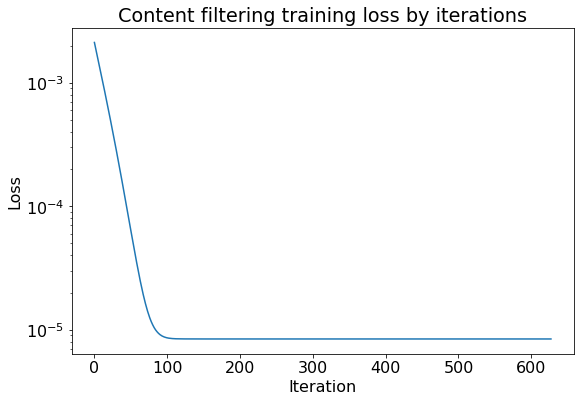

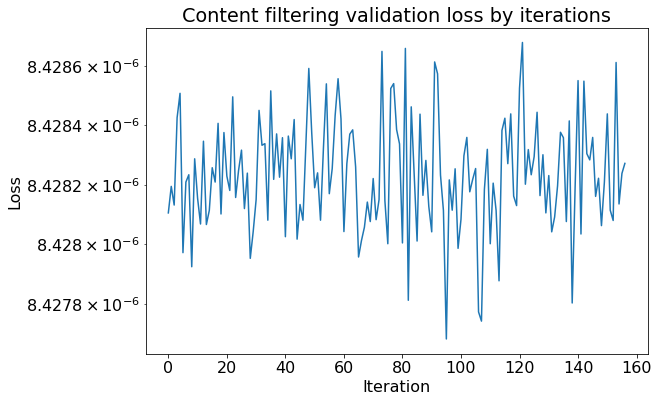

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'

plt.figure(figsize=(9,6))
plt.title('Content filtering training loss by iterations')
plt.plot(train_loss_iteration[:157*4], label='Train_loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')
plt.show()

plt.figure(figsize=(9,6))
plt.title('Content filtering validation loss by iterations')
plt.plot(val_loss_iteration[:157], label='Val_loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
# plt.legend()
plt.yscale('log')
plt.show()

In [57]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=False, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, pin_memory=True)

all_embed = []
content.eval()
with torch.no_grad():
    for n, data in enumerate(train_loader):
        data = data.to(device)
        embed = content(data)[1]
        all_embed.append(embed.cpu())
    for m, data in enumerate(val_loader):
        data = data.to(device)
        embed = content(data)[1]
        all_embed.append(embed.cpu())
embeds = torch.vstack(all_embed)

torch.Size([49992, 64])

In [58]:
np.save('book_embeds_content.npy', embeds)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cossim_conte = cosine_similarity(embeds, embeds)
np.save('book_cossim_collaborative.npy', cossim_collaborative)

In [22]:
# le = preprocessing.LabelEncoder()
# ratings['user_id'] = le.fit_transform(ratings['User-ID'])
# ratings['book_id'] = le.fit_transform(ratings['ISBN'])

In [23]:
# matrix = ratings[['user_id', 'book_id', 'Book-Rating']].rename({'Book-Rating': 'rating'}, axis=1)
# matrix
# X = matrix[['user_id', 'book_id']].values
# Y = matrix.rating.values

In [24]:
# num_user = len(matrix['user_id'].unique())
# num_book = len(matrix['book_id'].unique())
# num_samples = len(ratings)
# train_idx, test_idx = train_test_split(np.arange(num_samples), test_size=0.2)

# train_X = X[train_idx]
# train_Y = Y[train_idx]
# test_X = X[test_idx]
# test_Y = Y[test_idx]

# sparse_matrix = coo_matrix((train_Y, (train_X[:,0], train_X[:,1])), shape=(num_user, num_book), dtype=np.float32)

# model = NMF(n_components=100, init='nndsvda', max_iter=int(1e5), random_state=0)
# W = model.fit_transform(sparse_matrix)
# H = model.components_
# print(model.reconstruction_err_)
# print(model.n_iter_)

In [25]:
# W_test = coo_matrix(W[test_X[:,0]])
# H_test = coo_matrix(H[:, test_X[:,1]])
# coo_matrix((W_test*H_test.T).sum(1))

In [26]:
# H_test.T.multiply(W_test).sum(1)

In [27]:
# (((W[test_X[:,0]] * H[:, test_X[:,1]].T).sum(1) - test_Y)**2).mean()

In [28]:
# (((W[train_X[:,0]] * H[:, train_X[:,1]].T).sum(1) - train_Y)**2).mean()

In [29]:
# class Collaborative(Dataset):
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y
        
#     def __len__(self):
#         return len(self.y)
    
#     def __getitem__(self, index):
#         x = self.x[index]
#         x1 = torch.from_numpy(np.arange(num_user) == (x[0] - 1)).float()
#         x2 = torch.from_numpy(np.arange(num_book) == (x[1] - 1)).float()
#         y = torch.tensor(self.y[index]).float().unsqueeze(0)
#         return x1, x2, y

In [30]:
# train_set = Collaborative(train_X, train_Y)
# train_loader = DataLoader(train_set, batch_size=256, shuffle=True, pin_memory=True)
# val_set = Collaborative(test_X, test_Y)
# val_loader = DataLoader(val_set, batch_size=256, shuffle=False, pin_memory=True)

In [31]:
# class CollaborativeFilter(nn.Module):
#     def __init__(self, user_dim, item_dim, latent_dim, hidden_dim, num_classes, dropout=0):
#         super().__init__()
        
#         self.user_embed = nn.Linear(user_dim, latent_dim)
#         self.book_embed = nn.Linear(item_dim, latent_dim)
        
#         self.mlp = nn.Sequential(nn.ReLU(),
#                                  nn.Dropout(dropout),
#                                  nn.Linear(latent_dim*2, hidden_dim),
#                                  nn.ReLU(),
#                                  nn.Dropout(dropout),
#                                  nn.Linear(hidden_dim, num_classes))
        
#     def forward(self, x, y):
#         user_embed = self.user_embed(x)
#         book_embed = self.book_embed(y)
#         logit = self.mlp(torch.cat([user_embed, book_embed], dim=1))
#         return logit

In [32]:
# collaborative = CollaborativeFilter(num_user, num_book, 64, 32, 1)
# criterion_collaborative = nn.MSELoss()
# optimizer_collaborative = torch.optim.Adam(collaborative.parameters())

In [33]:
# def train_collaborative(model, epochs, train_loader, val_loader, optimizer, criterion, device):
#     train_loss = []
#     train_acc = []
    
#     val_loss = []
#     val_acc = []
    
#     model.to(device)
#     model.train()
#     for i in range(epochs):
#         print(f'Epoch {i+1}:')
#         for n, (x1, x2, target) in enumerate(train_loader):
#             x1 = x1.to(device)
#             x2 = x2.to(device)
#             target = target.to(device)
            
#             output = model(x1, x2)
# #             pred = logit.argmax(1)
            
# #             acc.append((pred == target).float().mean())
            
#             loss = criterion(output, target)
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
            
#             train_loss.append(loss.detach().cpu())
#             if (n+1)% 100 == 0:
#                 print(f'Batch [{n+1}/{len(train_loader)}], Training loss is {np.mean(train_loss).item()}.')
# #                 print(f'Batch [{n+1}/{len(train_loader)}], Training accuracy is {torch.mean(train_acc).item()}.')
        
#         model.eval()
#         with torch.no_grad():
#             for m, (x1, x2, target) in enumerate(val_loader):
#                 x1 = x1.to(device)
#                 x2 = x2.to(device)
#                 target = target.to(device)

#                 output = model(x1, x2)
#     #             pred = logit.argmax(1)

#     #             val_acc.append((pred == target).float().mean())

#                 loss = criterion(output, target)

#                 val_loss.append(loss.cpu())

#                 if (m+1)% 100 == 0:
#                     print(f'Batch [{m+1}/{len(val_loader)}], Validation loss is {np.mean(val_loss).item()}.')
#     #                 print(f'Batch [{m+1}/{len(val_loader)}], Validation accuracy is {torch.mean(val_acc).item()}.')
            
#         model.train()
        
# #     return train_loss, train_acc, val_loss, val_acc
#     return train_loss, val_loss

In [34]:
# train_collaborative(collaborative, 100, train_loader, val_loader, optimizer_collaborative, criterion_collaborative, device)

In [20]:
# Training_loss = [9.610832785256207e-05, 5.233778210822493e-05, 3.774255674215965e-05, 3.0444150979747064e-05, 2.6064779376611114e-05, 2.3145101295085624e-05, 2.105969724652823e-05, 1.9495575543260202e-05, 1.827911546570249e-05, 1.730598887661472e-05, 1.6509680790477432e-05, 1.584620440553408e-05, 1.5284840628737584e-05, 1.4803670637775213e-05, 1.4386651855602395e-05, 1.4021813512954395e-05,
#                  1.3424629287328571e-05, 1.316748694080161e-05, 1.2936186976730824e-05, 1.2726950444630347e-05, 1.2536768736026715e-05, 1.236319076269865e-05, 1.2204070117149968e-05, 1.2057732419634704e-05, 1.1922697012778372e-05, 1.1797669685620349e-05, 1.1681592695822474e-05, 1.157354472525185e-05, 1.1472702681203373e-05, 1.1378415365470573e-05, 1.1290010661468841e-05, 1.1206986528122798e-05,
#                  1.105806131818099e-05, 1.0988326721417252e-05, 1.0922371984634083e-05, 1.0859905160032213e-05, 1.0800650670717005e-05, 1.0744372048065998e-05, 1.0690856470318977e-05, 1.063989293470513e-05, 1.059131227520993e-05, 1.0544928954914212e-05, 1.0500629286980256e-05, 1.045825320034055e-05, 1.0417684279673267e-05, 1.037880610965658e-05, 1.0341535016777925e-05, 1.0305748219252564e-05,
#                  1.023964705382241e-05, 1.0207810191786848e-05, 1.0177156582358293e-05, 1.01476116469712e-05, 1.0119133548869286e-05, 1.0091663170896936e-05, 1.0065125934488606e-05, 1.0039502740255557e-05, 1.0014730833063368e-05, 9.990786566049792e-06, 9.9676035461016e-06, 9.945179044734687e-06, 9.923420293489471e-06, 9.902372767101042e-06, 9.881928235699888e-06, 9.86212216957938e-06,
#                  9.824962035054341e-06, 9.806790330912918e-06, 9.789136129256804e-06, 9.77196941676084e-06, 9.755293831403833e-06, 9.739054803503677e-06, 9.723242328618653e-06, 9.707862773211673e-06, 9.692891580925789e-06, 9.678279639047105e-06, 9.66404149949085e-06, 9.650177162257023e-06, 9.636636605137028e-06, 9.623434380046092e-06, 9.610555935068987e-06, 9.59797398536466e-06,
#                  9.57415522861993e-06, 9.562413652020041e-06, 9.550951290293597e-06, 9.539735401631333e-06, 9.528768714517355e-06, 9.518057595414575e-06, 9.507572940492537e-06, 9.497318387730047e-06, 9.487276656727772e-06, 9.477440471528098e-06, 9.467826203035656e-06, 9.458407475904096e-06, 9.449184290133417e-06, 9.440128451387864e-06, 9.431269972992595e-06, 9.42258247960126e-06,
#                  9.406035132997204e-06, 9.397833309776615e-06, 9.389782462676521e-06, 9.381885320181027e-06, 9.374142791784834e-06, 9.36654305405682e-06, 9.35907428356586e-06, 9.351751032227185e-06, 9.344556019641459e-06, 9.337491974292789e-06, 9.330554348707665e-06, 9.323744052380789e-06, 9.317038347944617e-06, 9.310457244282588e-06, 9.303987098974176e-06, 9.29762791201938e-06,
#                  9.285462510888465e-06, 9.279400728701148e-06, 9.273445357393939e-06, 9.26758275454631e-06, 9.26182110561058e-06, 9.256142220692709e-06, 9.250557923223823e-06, 9.245062756235711e-06, 9.239653991244268e-06, 9.234331628249492e-06, 9.22908202483086e-06, 9.223927918355912e-06, 9.218839295499492e-06, 9.213833436660934e-06, 9.208903065882623e-06, 9.204042726196349e-06,
#                  9.19472768146079e-06, 9.190070159093011e-06, 9.18548357731197e-06, 9.18096429813886e-06, 9.176503226626664e-06, 9.172116733680014e-06, 9.167777534457855e-06, 9.16349654289661e-06, 9.159282853943296e-06, 9.155129191640299e-06, 9.151030099019408e-06, 9.146986485575326e-06, 9.142996532318648e-06, 9.13906296773348e-06, 9.135173058893997e-06, 9.131338629231323e-06,
#                  9.123963536694646e-06, 9.120275535678957e-06, 9.116632099903654e-06, 9.113030500884634e-06, 9.109480743063614e-06, 9.105973731493577e-06, 9.102515832637437e-06, 9.099089766095858e-06, 9.095722816709895e-06, 9.092387699638493e-06, 9.089086233871058e-06, 9.085835699806921e-06, 9.08261881704675e-06, 9.07944286154816e-06, 9.076303285837639e-06, 9.073200999409892e-06]
# Training_loss

In [19]:
# Validation_loss = [8.550097845727578e-06, 8.549845006200485e-06, 8.549892299924977e-06, 8.549999620299786e-06, 
#                    8.550797247153241e-06, 8.551269274903461e-06, 8.551690370950382e-06, 8.552024155505933e-06, 
#                    8.552731742383912e-06, 8.553229235985782e-06, 8.553682164347265e-06, 8.55408961797366e-06, 
#                    8.554869054933079e-06, 8.555441127100494e-06, 8.5559577200911e-06, 8.556435204809532e-06, 
#                    8.556907232559752e-06, 8.557212822779547e-06, 8.557502951589413e-06, 8.557783075957559e-06, 
#                    8.5577012214344e-06, 8.55755752127152e-06, 8.557439286960289e-06, 8.557351065974217e-06, 
#                    8.55719918035902e-06, 8.557052751712035e-06, 8.55692724144319e-06, 8.556822649552487e-06, 
#                    8.556668035453185e-06, 8.556538887205534e-06, 8.55642883834662e-06, 8.55632697494002e-06, 
#                    8.556169632356614e-06, 8.55603411764605e-06, 8.555914064345416e-06, 8.55580856296001e-06, 
#                    8.55569578561699e-06, 8.55560301715741e-06, 8.555524800613057e-06, 8.55545931699453e-06]
# Validation_loss